In [1]:
import msprime
import tskit
from IPython.display import SVG

In [2]:
msprime.__version__

'0.7.0'

In [3]:
tskit.__version__

'0.1.4'

In [4]:
tree_sequence = msprime.simulate(sample_size=10, Ne=1000, length=1e6, recombination_rate=2e-8, mutation_rate=1e-7, random_seed=2)
tree = tree_sequence.first()

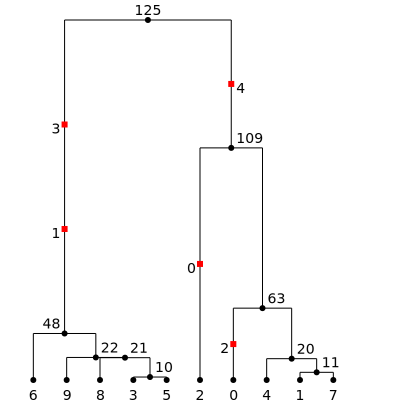

In [5]:
SVG(tree.draw(width=400, height=400))

In [6]:
print(tree.draw(format="ascii"))

       125           
  +----+----+        
  |         109      
  |       +-+-+      
  |       |   63     
  |       | +-+-+    
  48      | |   |    
+-+-+     | |   |    
|   22    | |   |    
| +-+-+   | |   |    
| |   21  | |   |    
| | +-++  | |   |    
| | |  |  | |   20   
| | |  |  | | +-++   
| | |  |  | | |  11  
| | |  |  | | | +++  
| | |  10 | | | | |  
| | | +++ | | | | |  
6 9 8 3 5 2 0 4 1 7  



In [7]:
print(tree.draw(format="unicode"))

       125           
  ┏━━━━┻━━━━┓        
  ┃         109      
  ┃       ┏━┻━┓      
  ┃       ┃   63     
  ┃       ┃ ┏━┻━┓    
  48      ┃ ┃   ┃    
┏━┻━┓     ┃ ┃   ┃    
┃   22    ┃ ┃   ┃    
┃ ┏━┻━┓   ┃ ┃   ┃    
┃ ┃   21  ┃ ┃   ┃    
┃ ┃ ┏━┻┓  ┃ ┃   ┃    
┃ ┃ ┃  ┃  ┃ ┃   20   
┃ ┃ ┃  ┃  ┃ ┃ ┏━┻┓   
┃ ┃ ┃  ┃  ┃ ┃ ┃  11  
┃ ┃ ┃  ┃  ┃ ┃ ┃ ┏┻┓  
┃ ┃ ┃  10 ┃ ┃ ┃ ┃ ┃  
┃ ┃ ┃ ┏┻┓ ┃ ┃ ┃ ┃ ┃  
6 9 8 3 5 2 0 4 1 7  



In [8]:
# taken from https://stackoverflow.com/a/16118005/
# A: East Asian Ambiguous
# Na: East Asian Narrow
import unicodedata
my_string = "┃┏━┻┓120 ♞中"
for c in my_string:
    print(c, unicodedata.east_asian_width(c))

┃ A
┏ A
━ A
┻ A
┓ A
1 Na
2 Na
0 Na
  Na
♞ N
中 W


In [9]:
print("♞" * 10)
print("中" * 10)
print("┻" * 10)
print("0" * 20)
print("0" * 5 + " " * 10 + "0" * 5)
print("0" * 10)

♞♞♞♞♞♞♞♞♞♞
中中中中中中中中中中
┻┻┻┻┻┻┻┻┻┻
00000000000000000000
00000          00000
0000000000


On my browser, the three rows of unicode letters line up

## Solution 1: replace all characters with full-width versions

Thanks to https://stackoverflow.com/a/4632373/

In [10]:
# full width versions (SPACE is non-contiguous with ! through ~)
SPACE = '\N{IDEOGRAPHIC SPACE}'
EXCLA = '\N{FULLWIDTH EXCLAMATION MARK}'
TILDE = '\N{FULLWIDTH TILDE}'

# strings of ASCII and full-width characters (same order)
west = ''.join(chr(i) for i in range(ord(' '),ord('~')))
east = SPACE + ''.join(chr(i) for i in range(ord(EXCLA),ord(TILDE)))

# build the translation table
full = str.maketrans(west,east)

In [11]:
print(tree.draw(format="unicode").translate(full))

　　　　　　　１２５　　　　　　　　　　　
　　┏━━━━┻━━━━┓　　　　　　　　
　　┃　　　　　　　　　１０９　　　　　　
　　┃　　　　　　　┏━┻━┓　　　　　　
　　┃　　　　　　　┃　　　６３　　　　　
　　┃　　　　　　　┃　┏━┻━┓　　　　
　　４８　　　　　　┃　┃　　　┃　　　　
┏━┻━┓　　　　　┃　┃　　　┃　　　　
┃　　　２２　　　　┃　┃　　　┃　　　　
┃　┏━┻━┓　　　┃　┃　　　┃　　　　
┃　┃　　　２１　　┃　┃　　　┃　　　　
┃　┃　┏━┻┓　　┃　┃　　　┃　　　　
┃　┃　┃　　┃　　┃　┃　　　２０　　　
┃　┃　┃　　┃　　┃　┃　┏━┻┓　　　
┃　┃　┃　　┃　　┃　┃　┃　　１１　　
┃　┃　┃　　┃　　┃　┃　┃　┏┻┓　　
┃　┃　┃　　１０　┃　┃　┃　┃　┃　　
┃　┃　┃　┏┻┓　┃　┃　┃　┃　┃　　
６　９　８　３　５　２　０　４　１　７　　



Note: it does not work if I just try to insert space characters

In [12]:
my_string = tree.draw(format="unicode")
my_string = my_string.replace(" ", "  ")
for i in range(10):
    my_string = my_string.replace(str(i), ' ' + str(i))
print(my_string)

               1 2 5                      
    ┏━━━━┻━━━━┓                
    ┃                   1 0 9            
    ┃              ┏━┻━┓            
    ┃              ┃       6 3          
    ┃              ┃  ┏━┻━┓        
     4 8            ┃  ┃      ┃        
┏━┻━┓          ┃  ┃      ┃        
┃       2 2        ┃  ┃      ┃        
┃  ┏━┻━┓      ┃  ┃      ┃        
┃  ┃       2 1    ┃  ┃      ┃        
┃  ┃  ┏━┻┓    ┃  ┃      ┃        
┃  ┃  ┃    ┃    ┃  ┃       2 0      
┃  ┃  ┃    ┃    ┃  ┃  ┏━┻┓      
┃  ┃  ┃    ┃    ┃  ┃  ┃     1 1    
┃  ┃  ┃    ┃    ┃  ┃  ┃  ┏┻┓    
┃  ┃  ┃     1 0  ┃  ┃  ┃  ┃  ┃    
┃  ┃  ┃  ┏┻┓  ┃  ┃  ┃  ┃  ┃    
 6   9   8   3   5   2   0   4   1   7    

